In [1]:
import json
import os 
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from glob import glob
from pathlib import Path
from tqdm import tqdm
from PIL import Image

In [6]:
with open("../classes.txt") as f:
    classes = eval(f.read())

print(f"{classes=}")

dir = Path("../validation")
dir_ann = dir / "annos"

classes=['long sleeve dress', 'long sleeve outwear', 'long sleeve top', 'short sleeve dress', 'short sleeve outwear', 'short sleeve top', 'shorts', 'skirt', 'sling', 'sling dress', 'trousers', 'vest', 'vest dress']


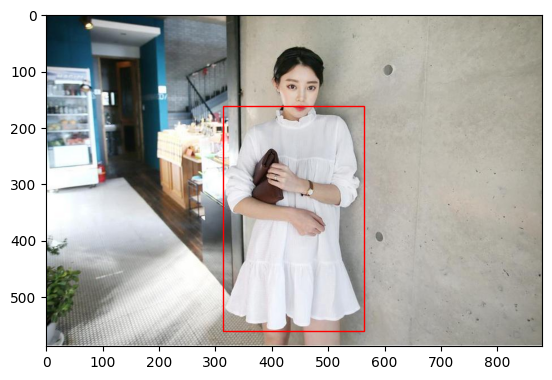

In [7]:


img = None

anns = list(test_ann.glob("*"))
random.shuffle(anns)

for ann in anns:
    
    fname = ann.stem
    img = (dir / "image" / fname).with_suffix(".jpg")
    
    with open(ann) as f:
        data = json.load(f)
    break

n = 1
boxes = []

while f"item{n}" in data:
    item = data[f"item{n}"]
    boxes.append({
        "cords": item["bounding_box"],
        "class": item["category_name"]
    })
    n += 1
    
img = Image.open(img)

fig, ax = plt.subplots()
ax.imshow(img)
for box in boxes:
    cords = box["cords"]
    rect = patches.Rectangle((cords[0], cords[1]), cords[2] - cords[0], cords[3] - cords[1], linewidth=1, facecolor='none', edgecolor='r')
    ax.add_patch(rect)
plt.show()
    

In [4]:
(dir / "yolo_annos").mkdir(parents=True, exist_ok=True)
os.remove(dir / "annos" / ".DS_Store") if os.path.exists(dir / "annos" / ".DS_Store") else None
        
for ann in tqdm(list(dir_ann.glob("*"))):
    fname = ann.stem
    img = (dir / "image" / fname).with_suffix(".jpg")
    img = Image.open(img)
    width, height = img.size
    
    with open(ann) as f:
        data = json.load(f)
    
    n = 1
    output = []
    while f"item{n}" in data:
        item = data[f"item{n}"]
        x1, y1, x2, y2 = item["bounding_box"]
        class_index = classes.index(item["category_name"])
        xc = ((x1 + x2) // 2) / width
        yc = ((y1 + y2) // 2) / height
        w = (x2 - x1) / width
        h = (y2 - y1) / height
        output.append(f"{class_index} {xc} {yc} {w} {h}")
            
        
    
        n += 1
    with open((dir / "yolo_annos" / ann.stem).with_suffix(".txt"), "w+") as f1:
        f1.write("\n".join(output))

os.remove(dir / "annos" / ".DS_Store") if os.path.exists(test / "annos" / ".DS_Store") else None
os.remove(dir / "yolo_annos" / ".DS_Store") if os.path.exists(test / "yolo_annos" / ".DS_Store") else None
    
    
        
    

32153it [04:44, 112.99it/s]
